# Exemplo prático: Kmeans

In [ ]:
n_points_per_cluster=100
n_clusters=3
n_points = n_points_per_cluster * n_clusters

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_kmeans(X, C, partitions=None, title=None):
  """ Função para plotar os pontos e os centroides

  Args:
    X np.array: matriz com os pontos do conjunto de dados;
    C np.array: matriz com os pontos dos centroides;
    partitions np.array: matriz com as partições encontradas 
    durante a clusterização;
    title str: título do gráfico
  """
  colors = ['r', 'g', 'b']
  clear_output()
  plt.figure(figsize=(8,8))
  
  for i in range(3):
    plt.scatter(C[i,0], C[i,1], s=200, c=colors[i], label=f'k{i+1}')
  
  if partitions is None:
    plt.scatter(X[:,0], X[:,1], c='gray', alpha=.5)
  else:
    for i in range(3):
      mask = i == partitions
      plt.scatter(X[mask,0], X[mask,1], c=colors[i], alpha=.5)

  if title is not None:
    plt.title(title)
  plt.legend()
  plt.show()

## Inicialização do conjunto de dados

In [ ]:
def generate_dataset(n_points_per_cluster=100, n_clusters=3, seed=20):
  np.random.seed(seed)

  # pontos
  clusters = [
              np.random.normal(
                  np.random.rand(2), 
                  [0.1] * 2, 
                  (n_points_per_cluster, 2)
                  )
              for _ in range(n_clusters)
              ]
  X = np.concatenate(clusters)

  # centroides
  C = np.random.rand(n_clusters * 2).reshape((n_clusters, 2))
  return X, C

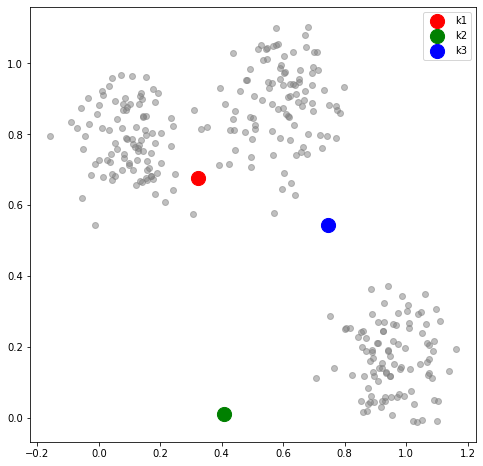

In [ ]:
X, C = generate_dataset()
plot_kmeans(X, C)

## Buscando o centroid mais próximo

In [ ]:
def get_partitions(X, C, n_clusters):

  k_dists = []
  for i in range(n_clusters):
    k_dist = np.sum((X - C[i,:]) ** 2, axis = 1).reshape(n_points, -1)
    k_dists.append(k_dist)

  dist_matrix = np.concatenate(k_dists, axis=1)
  partitions = dist_matrix.argmin(axis=1)
  return partitions

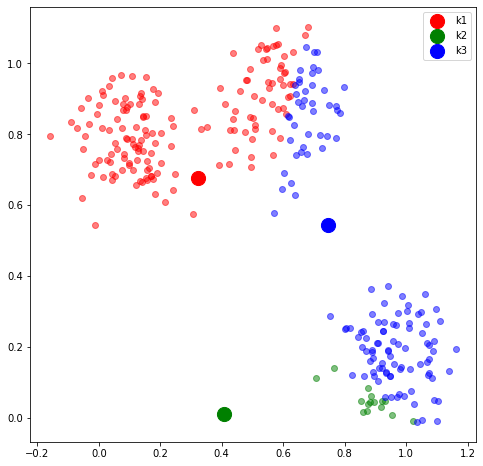

In [ ]:
partitions = get_partitions(X, C, n_clusters)
plot_kmeans(X, C, partitions)

## Atualizando os centróides a partir das partições

In [ ]:
def update_centroids(X, partitions):
  partition_opt = sorted(set(partitions))
  centroid_list = []
  for partition_id in partition_opt:
    _mean = X[partitions == partition_id, :].mean(axis=0).reshape(1,-1)
    centroid_list.append(_mean)
  C = np.concatenate(centroid_list, axis=0)
  return C

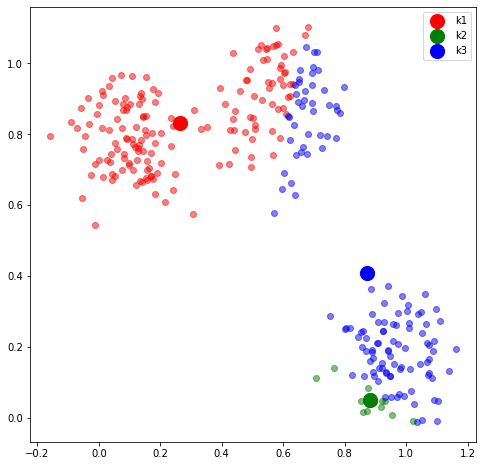

In [ ]:
new_C = update_centroids(X, partitions)
plot_kmeans(X, new_C, partitions)

## Repetindo o processo iterativamente

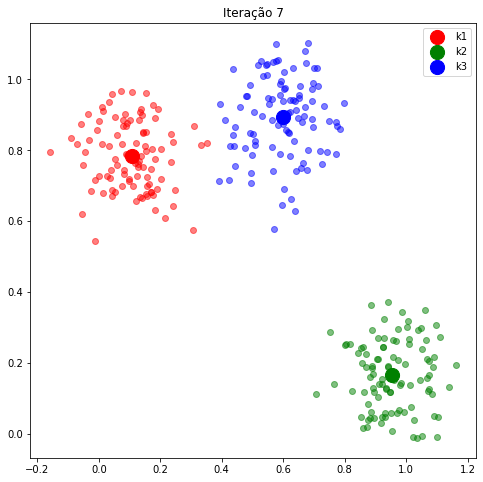

In [ ]:
X, C = generate_dataset()

for i in range(10):
  partitions = get_partitions(X, C, n_clusters)
  plot_kmeans(X, C, partitions, f'Iteração {i}')
  C = update_centroids(X, partitions)
  time.sleep(2)

# Cálculo do erro quadrático

In [ ]:
X, C = generate_dataset()
partitions = get_partitions(X, C, n_clusters)

def get_squared_error(X, C, partitions):
  dists = []
  for i, x in enumerate(X):
    for j, c in enumerate(C):
      if partitions[i] == j:
        dist = np.sqrt(np.sum((x - c) ** 2))
        dists.append(dist)

  J = np.sum(dists)
  return J

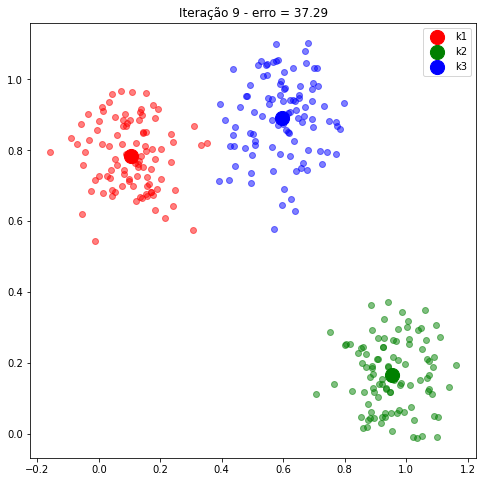

In [ ]:
X, C = generate_dataset()

for i in range(10):
  partitions = get_partitions(X, C, n_clusters)
  J = get_squared_error(X, C, partitions)
  plot_kmeans(X, C, partitions, f'Iteração {i} - erro = {J:0.2f}')
  C = update_centroids(X, partitions)
  time.sleep(2)